# Lever Press Analysis

#### Notebook for analyzing mouse lever press behavior
Designed to allow analysis lever pressing behavior across all training sessions for an entire group of mice. Also compatible with analyzing training data from individual mice and across different number of sessions. Final section is set up to looking a processing and summarization of data for individual mice

In [1]:
# Import needed modules

from Lab_Analyses.Behavior import process_lever_behavior as plb
from Lab_Analyses.Behavior import summarize_lever_behavior as slb
from Lab_Analyses.Behavior import mouse_lever_behavior as mlb
from Lab_Analyses.Behavior import group_lever_press as glp
from Lab_Analyses.Behavior import behavior_plotting as bplot

### Specify data to be analyzed

In [2]:
# Set parent path where all session data for each mouse is located 
path_1 = r'Z:\People\Jake\Behavior\JW021'
path_2 = r'Z:\People\Jake\Behavior\JW023'
path_3 = r'Z:\People\Jake\Behavior\JW041'
path_4 = r'Z:\People\Jake\Behavior\JW045'

# Give id for each mouse 
id_1 = "JW021"
id_2 = "JW023"
id_3 = "JW041"
id_4 = "JW045"

# Indicate if the data was imaged or not
## Must be indicated for each session !!!
imaged_1 = [False for x in range(14)]
imaged_2 = [False for x in range(14)]
imaged_3 = [False for x in range(14)]
imaged_4 = [False for x in range(14)]

# Give info about the experiment for each mouse
exp_1 = "Control Spine Imaging"
exp_2 = "Control Spine Imaging"
exp_3 = "Control Spine Imaging"
exp_4 = "Control Spine Imaging"

# Put all information in interable lists
paths = [path_1, path_2, path_3, path_4]
ids = [id_1, id_2, id_3, id_4]
imageds = [imaged_1, imaged_2, imaged_3, imaged_4]
exps = [exp_1, exp_2, exp_3, exp_4]


### Process and summarize each dataset

In [3]:
# Process and summarize data for each mouse
summed_data = []
for path, id_, imaged, exp in zip(paths, ids, imageds, exps):
    print(id_)
    summed_data.append(mlb.analyze_mouse_lever_behavior(id_=id_, path=path, imaged=imaged, exp=exp))

JW021
-----------------------
Analyzing Mouse JW021
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW021
-----------------------
JW023
-----------------------
Analyzing Mouse JW023
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW023
-----------------------
JW041
-----------------------
Analyzing Mouse JW041
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW041
-----------------------
JW045
-----------------------
Analyzing Mouse JW045
 - Processing session 12
 - Summarizing session 12
Done Analyzing Mouse JW045
-----------------------


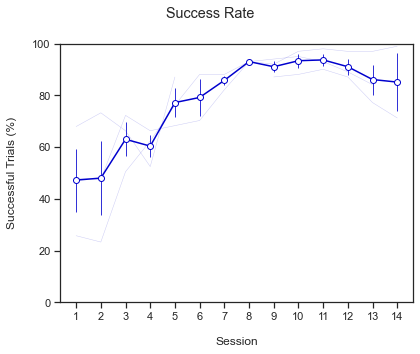

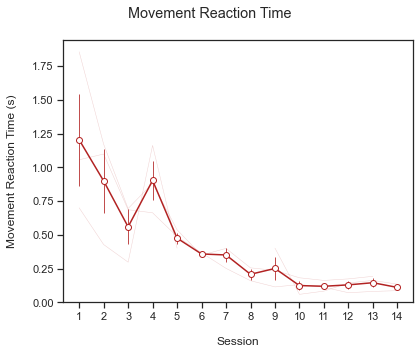

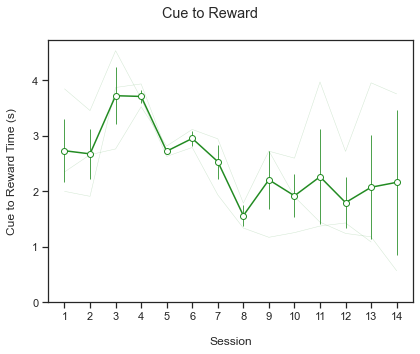

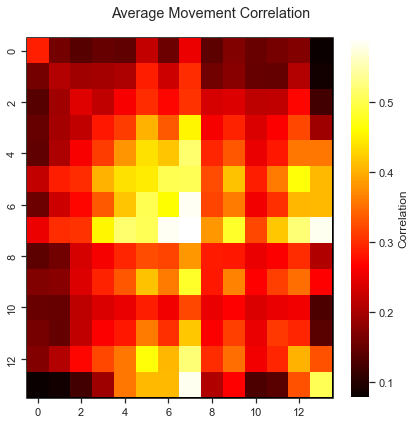

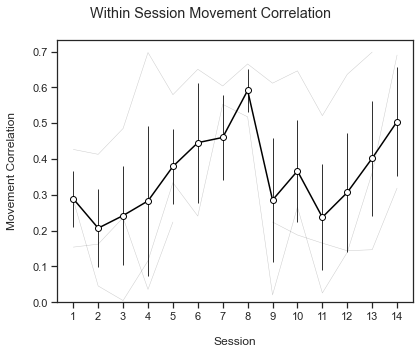

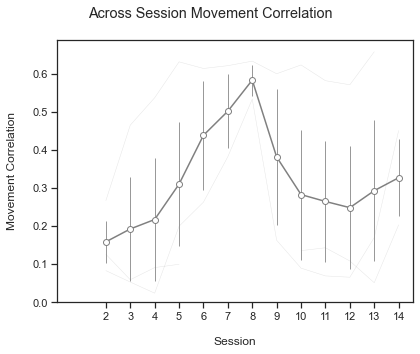

In [4]:
colors = {"success": "mediumblue", "reaction_time": "firebrick", "cue_to_reward": "forestgreen", "within": "black", "across":"grey"}
grouped_data = glp.Group_Lever_Press(summed_data[:-1])
grouped_data.plot_average_data(colors=colors)

JW021
JW023
JW041
JW045


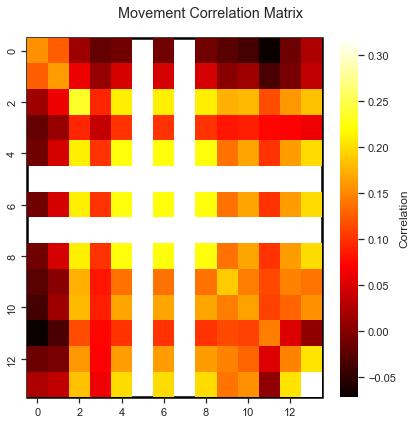

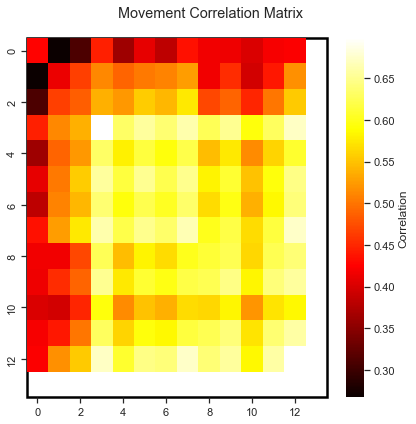

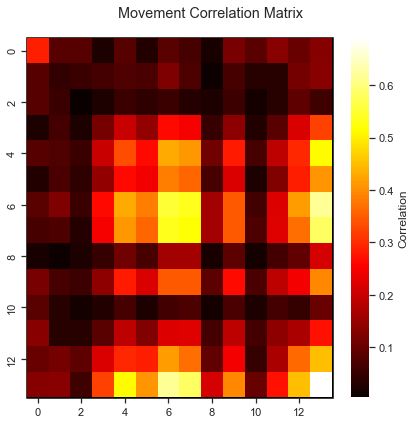

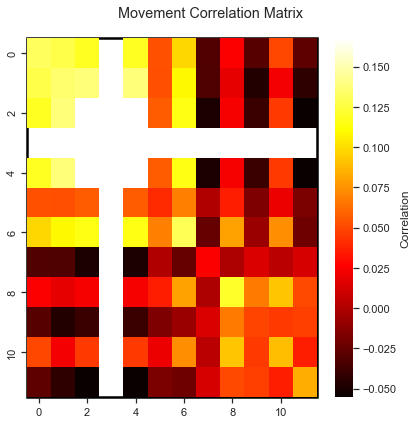

In [5]:
for data in summed_data:
    print(data.mouse_id)
    bplot.plot_movement_corr_matrix(data.correlation_matrix)

In [6]:
# Set parent path where all session data for each mouse is located 
path_1 = r'Z:\People\Jake\Behavior\JW022'
path_2 = r'Z:\People\Jake\Behavior\JW042'
path_3 = r'Z:\People\Jake\Behavior\JW043'
path_4 = r'Z:\People\Jake\Behavior\JW044'
path_5 = r'Z:\People\Jake\Behavior\JW046'

# Give id for each mouse 
id_1 = "JW022"
id_2 = "JW042"
id_3 = "JW043"
id_4 = "JW044"
id_5 = "JW046"

# Indicate if the data was imaged or not
## Must be indicated for each session !!!
imaged_1 = [False for x in range(14)]
imaged_2 = [False for x in range(14)]
imaged_3 = [False for x in range(14)]
imaged_4 = [False for x in range(14)]
imaged_5 = [False for x in range(14)]

# Give info about the experiment for each mouse
exp_1 = "GBP Spine Imaging"
exp_2 = "GBP Spine Imaging"
exp_3 = "GBP Spine Imaging"
exp_4 = "GBP Spine Imaging"
exp_5 = "GBP Spine Imaging"

# Put all information in interable lists
paths1 = [path_1, path_2, path_3, path_4, path_5]
ids1 = [id_1, id_2, id_3, id_4, id_5]
imageds1 = [imaged_1, imaged_2, imaged_3, imaged_4, imaged_5]
exps1 = [exp_1, exp_2, exp_3, exp_4, imaged_5]

In [7]:
# Process and summarize data for each mouse
summed_data1 = []
for path, id_, imaged, exp in zip(paths1, ids1, imageds1, exps1):
    print(id_)
    summed_data1.append(mlb.analyze_mouse_lever_behavior(id_=id_, path=path, imaged=imaged, exp=exp))

JW022
-----------------------
Analyzing Mouse JW022
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW022
-----------------------
JW042
-----------------------
Analyzing Mouse JW042
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW042
-----------------------
JW043
-----------------------
Analyzing Mouse JW043
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW043
-----------------------
JW044
-----------------------
Analyzing Mouse JW044
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW044
-----------------------
JW046
-----------------------
Analyzing Mouse JW046
 - Processing session 12
 - Summarizing session 12
Done Analyzing Mouse JW046
-----------------------


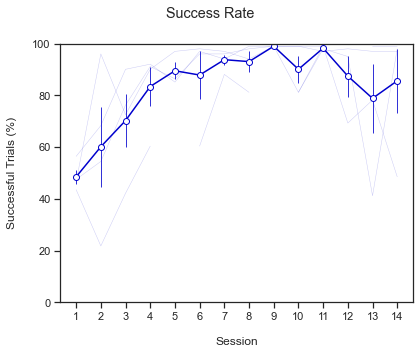

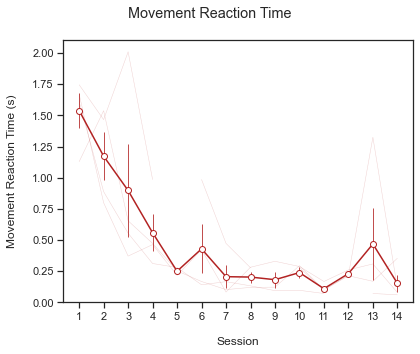

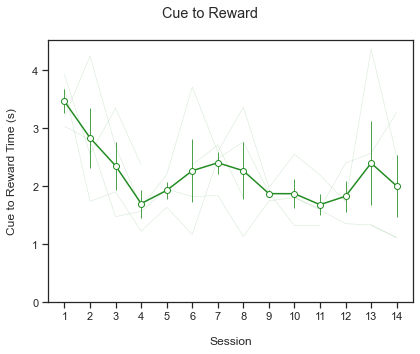

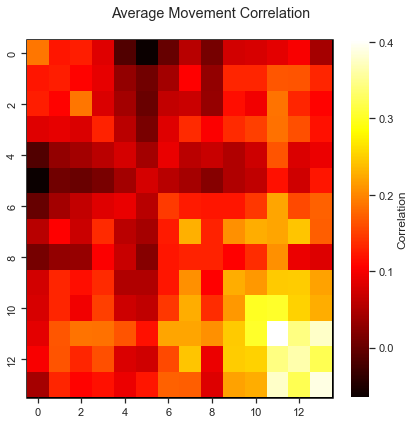

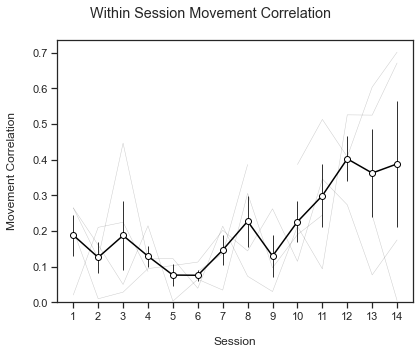

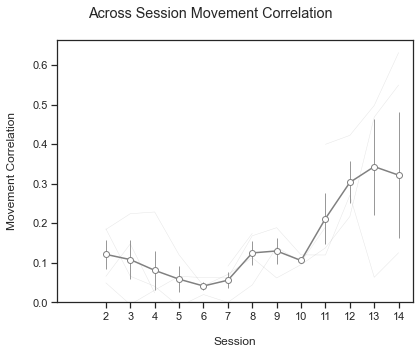

In [8]:
grouped_data1 = glp.Group_Lever_Press(summed_data1[:-1])
grouped_data1.plot_average_data(colors=colors)

JW022
JW042
JW043
JW044
JW046


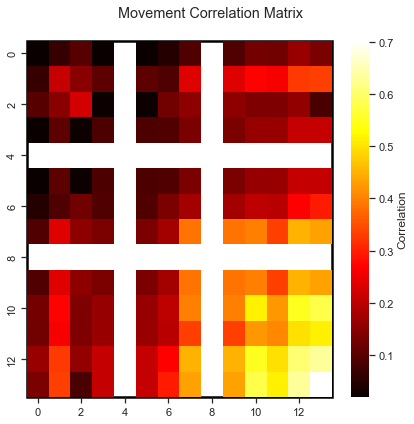

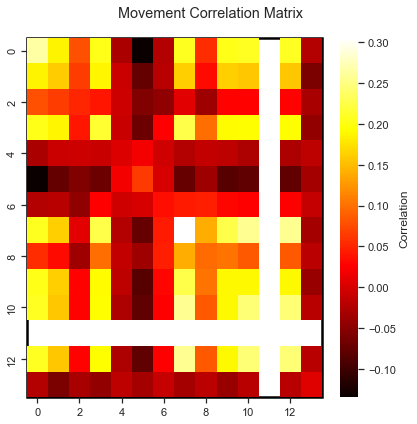

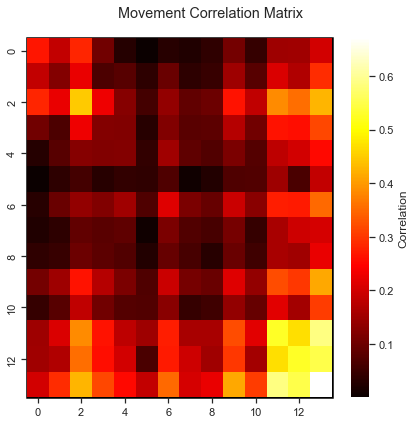

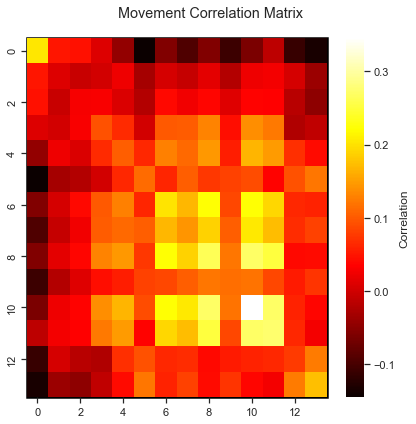

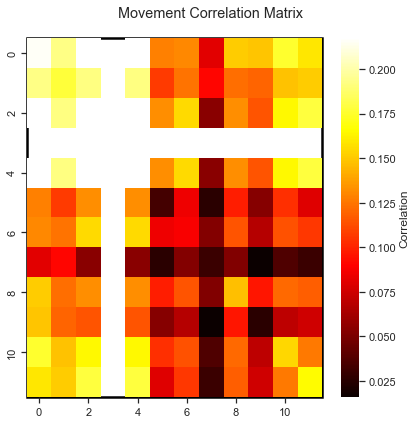

In [9]:
for data in summed_data1:
    print(data.mouse_id)
    bplot.plot_movement_corr_matrix(data.correlation_matrix)

In [54]:
#summed_data2 = summed_data[:-1] + summed_data1[:-1]
summed_data2 = [summed_data[1], summed_data[2], summed_data1[0], summed_data1[1], summed_data1[2], summed_data1[3]]

In [55]:
grouped_data2 = glp.Group_Lever_Press(summed_data2)

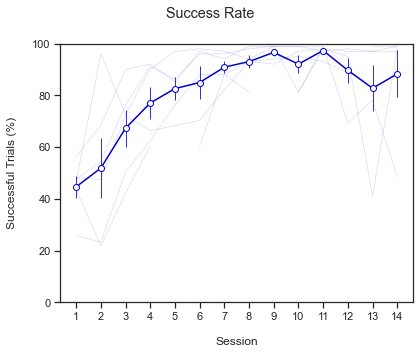

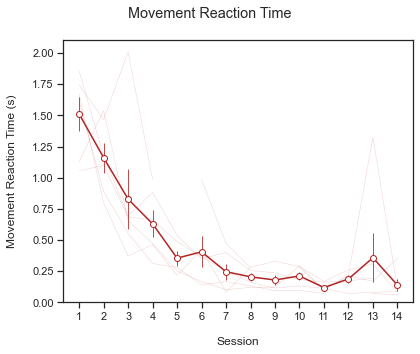

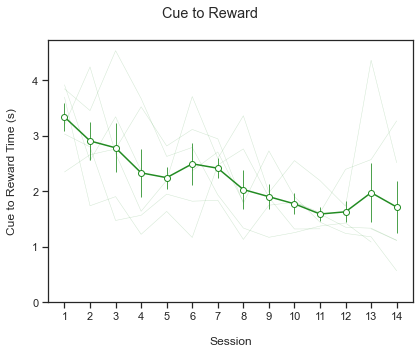

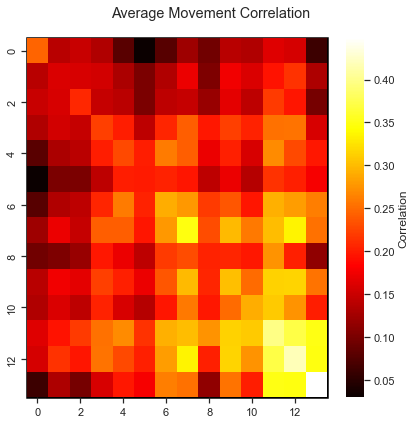

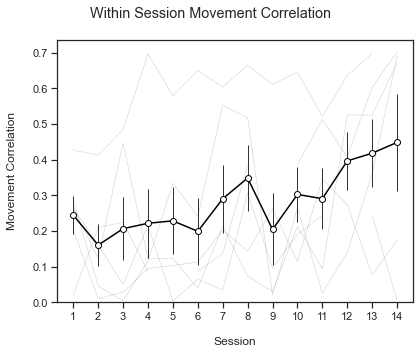

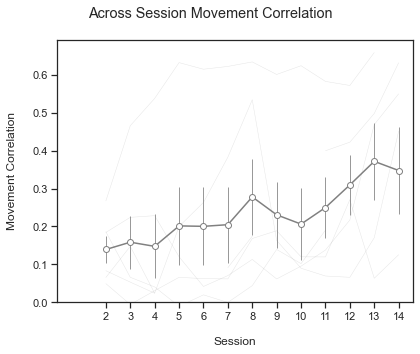

In [56]:
colors = {"success": "mediumblue", "reaction_time": "firebrick", "cue_to_reward": "forestgreen", "within": "black", "across":"grey"}
grouped_data2.plot_average_data(colors=colors,save=True)

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


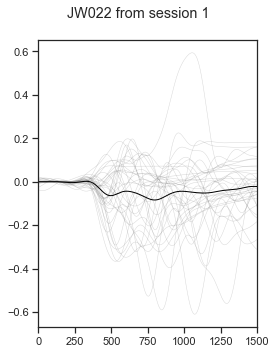

In [48]:
bplot.plot_session_rewarded_lever_presses(summed_data1[0], 1, save=True, x_lim=(0,1500), figsize=(4,5))

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


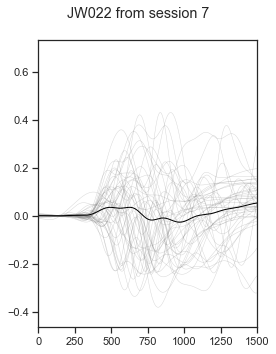

In [49]:
bplot.plot_session_rewarded_lever_presses(summed_data1[0], 7, save=True,  x_lim=(0,1500), figsize=(4,5))

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


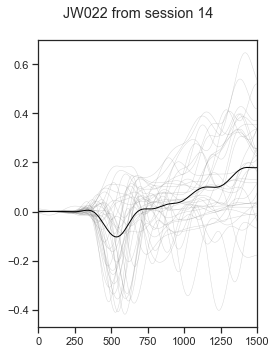

In [50]:
bplot.plot_session_rewarded_lever_presses(summed_data1[0], 14, save=True,  x_lim=(0,1500), figsize=(4,5))